# Ejercicio: Análisis de Regresión con el Dataset Wine Quality

## Descripción del Dataset

El dataset **Wine Quality** contiene resultados de análisis fisicoquímicos de vinos portugueses "Vinho Verde" y su calidad evaluada por expertos. El objetivo es predecir la calidad del vino basándose en sus propiedades químicas.

### Variables del dataset:
- **fixed acidity**: Acidez fija (g/L de ácido tartárico)
- **volatile acidity**: Acidez volátil (g/L de ácido acético)
- **citric acid**: Ácido cítrico (g/L)
- **residual sugar**: Azúcar residual (g/L)
- **chlorides**: Cloruros (g/L de cloruro de sodio)
- **free sulfur dioxide**: Dióxido de azufre libre (mg/L)
- **total sulfur dioxide**: Dióxido de azufre total (mg/L)
- **density**: Densidad (g/cm³)
- **pH**: pH del vino
- **sulphates**: Sulfatos (g/L de sulfato de potasio)
- **alcohol**: Contenido de alcohol (% vol)
- **quality**: Calidad del vino (puntuación de 0-10) - **Variable objetivo**

En este ejercicio, trabajarás con el dataset de vinos tintos y aplicarás diferentes técnicas de regresión para predecir la calidad del vino.

## 1. Importar librerías y cargar datos

In [39]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configurar seed para reproducibilidad
np.random.seed(42)

In [40]:
# Cargar el dataset de vinos tintos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, sep=';')

print("Dataset cargado exitosamente!")
print(f"Dimensiones del dataset: {wine_data.shape}")
print(f"\nColumnas del dataset:")
print(wine_data.columns.tolist())

Dataset cargado exitosamente!
Dimensiones del dataset: (1599, 12)

Columnas del dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## 2. Análisis Exploratorio de Datos (EDA)

### Ejercicio 2.1: Exploración inicial
Completa el análisis exploratorio inicial del dataset.

In [4]:
# Mostrar las primeras filas del dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# TODO: Muestra la información general del dataset (tipos de datos, valores no nulos)
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [95]:
# TODO: Calcula y muestra las estadísticas descriptivas del dataset
wine_data.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [43]:
# TODO: Verifica si hay valores nulos en el dataset
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Ejercicio 2.2: Análisis de la variable objetivo

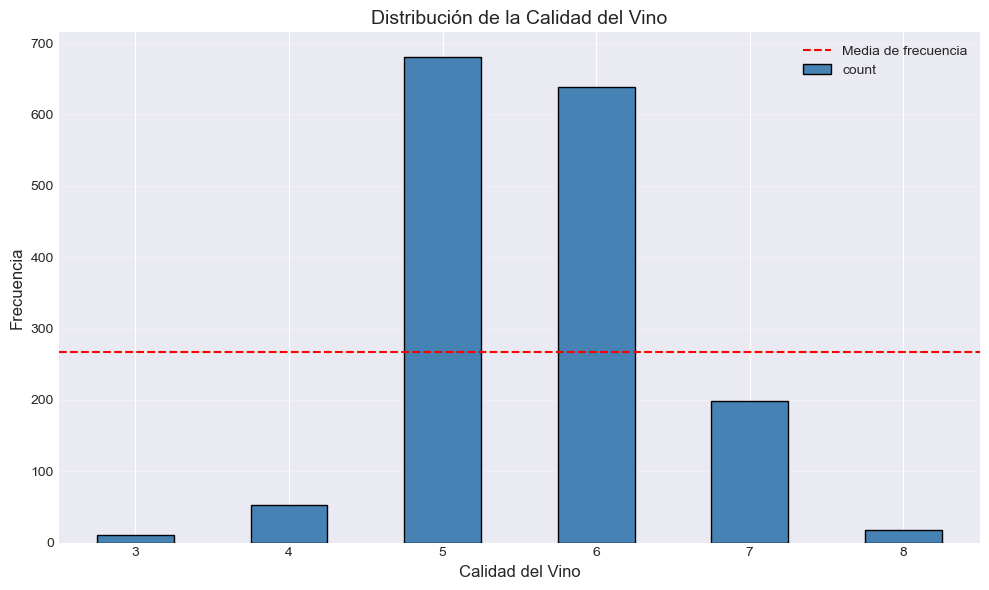

Estadísticas de la calidad del vino:
Media: 5.64
Mediana: 6.00
Desviación estándar: 0.81


In [45]:
# Analizar la distribución de la calidad del vino
plt.figure(figsize=(10, 6))
wine_data['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Calidad del Vino', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de la Calidad del Vino', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Agregar estadísticas
mean_quality = wine_data['quality'].mean()
median_quality = wine_data['quality'].median()
plt.axhline(y=wine_data['quality'].value_counts().mean(), color='red', linestyle='--', label=f'Media de frecuencia')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Estadísticas de la calidad del vino:")
print(f"Media: {mean_quality:.2f}")
print(f"Mediana: {median_quality:.2f}")
print(f"Desviación estándar: {wine_data['quality'].std():.2f}")

### Ejercicio 2.3: Matriz de correlación

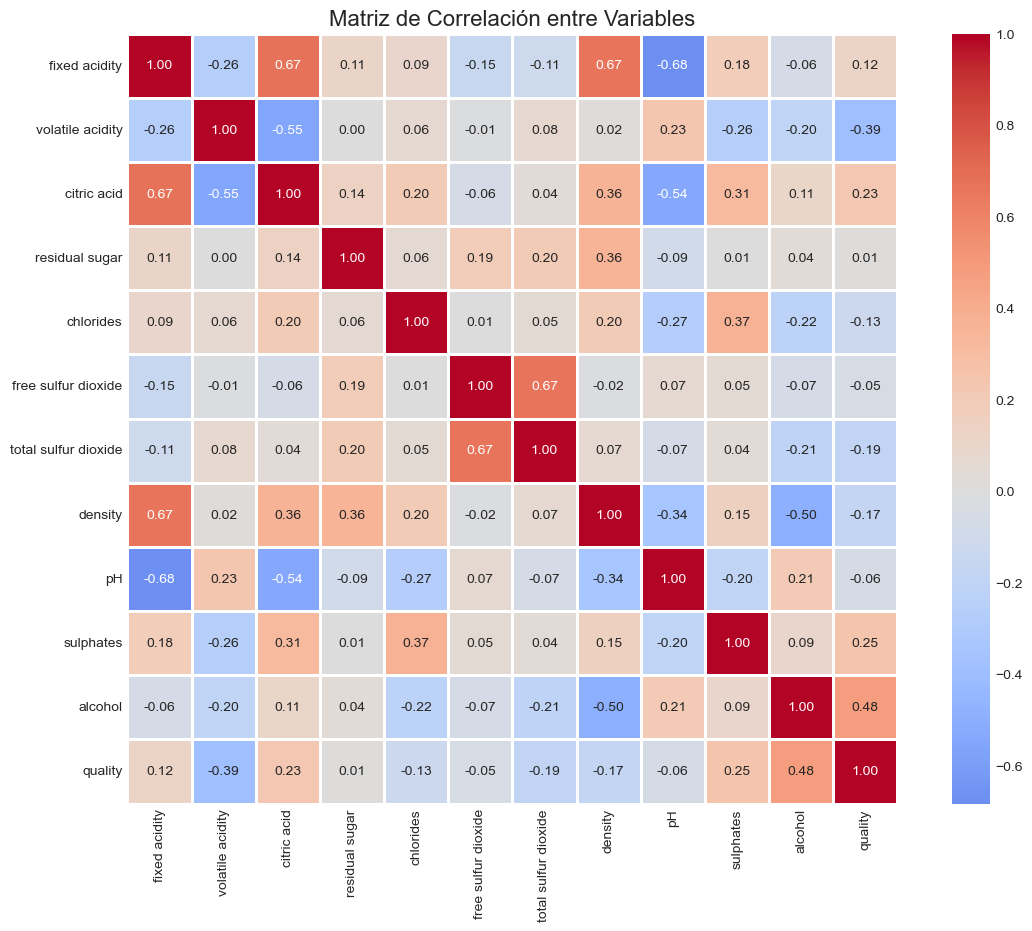

In [99]:
# TODO: Calcula la matriz de correlación y visualízala con un heatmap
# Pista: Usa sns.heatmap() con annot=True para mostrar los valores
# Tu código aquí

plt.figure(figsize=(14, 10))
Q = wine_data.corr()
sns.heatmap(Q,annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Matriz de Correlación entre Variables', fontsize=16 )
plt.show()

In [58]:
# TODO: Identifica y muestra las 5 variables más correlacionadas con 'quality'
quality_corr = Q['quality'].sort_values(ascending=False)
print("Correlación con calidad:")
print(quality_corr.head(6)) 

Correlación con calidad:
quality           1.000000
alcohol           0.476166
sulphates         0.251397
citric acid       0.226373
fixed acidity     0.124052
residual sugar    0.013732
Name: quality, dtype: float64


### Ejercicio 2.4: Visualización de relaciones

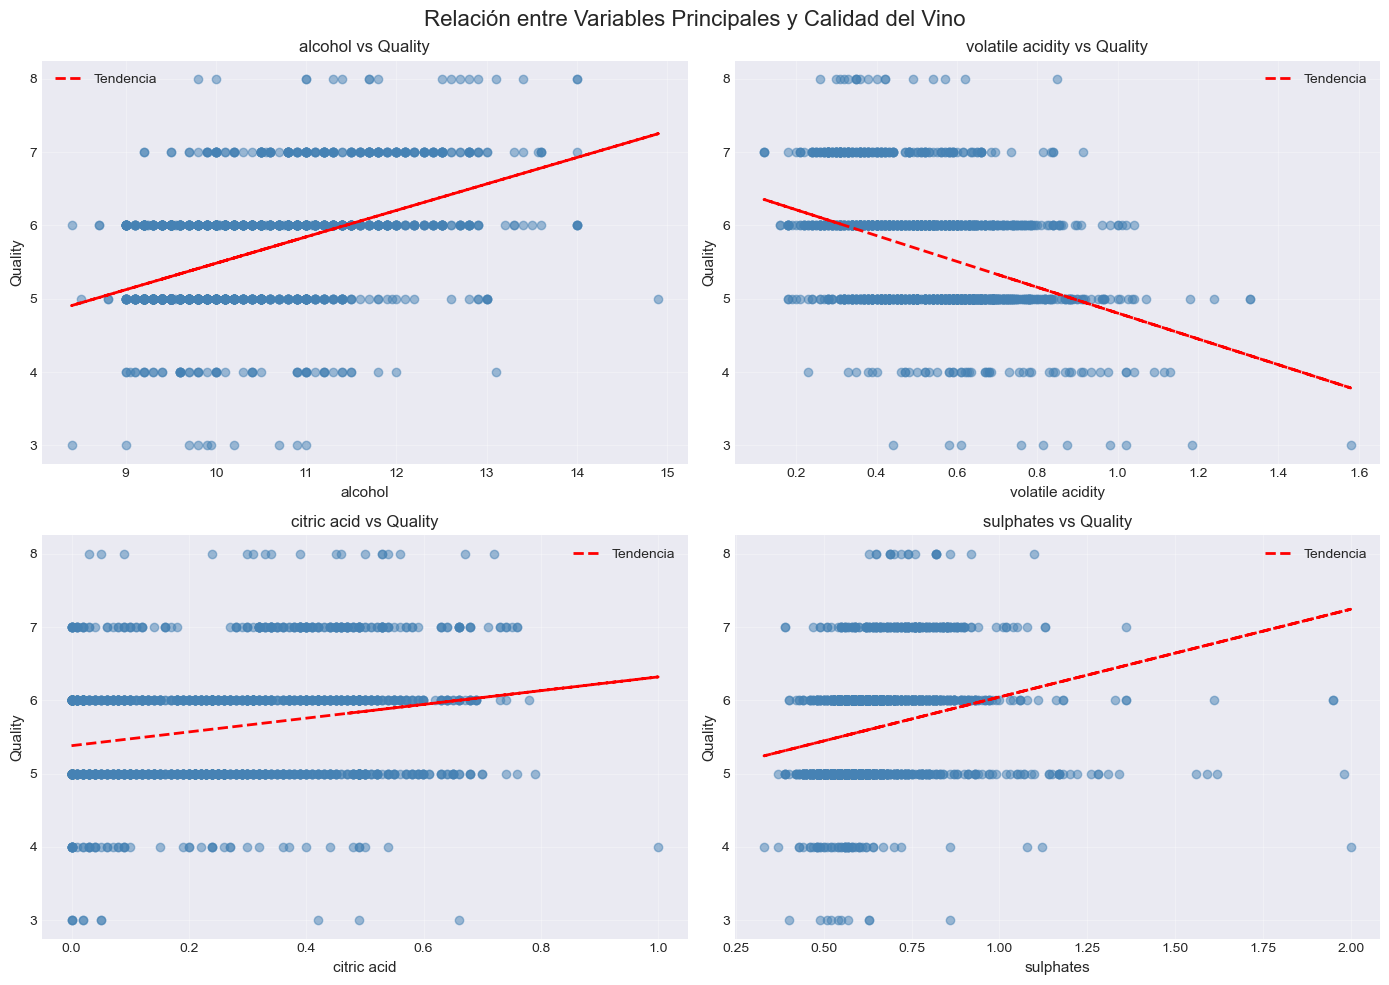

In [ ]:
# Visualizar las 4 variables más correlacionadas con quality
top_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relación entre Variables Principales y Calidad del Vino', fontsize=16)

for idx, (ax, feature) in enumerate(zip(axes.flat, top_features)):
    # TODO: Crea un scatter plot para cada variable vs quality
    ax.scatter(wine_data[feature], wine_data['quality'], alpha=0.5, color='steelblue')
    
    # Agregar línea de tendencia
    z = np.polyfit(wine_data[feature], wine_data['quality'], 1)
    p = np.poly1d(z)
    ax.plot(wine_data[feature], p(wine_data[feature]), "r--", linewidth=2, label='Tendencia')
    
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Quality', fontsize=11)
    ax.set_title(f'{feature} vs Quality', fontsize=12)
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Preparación de Datos

In [106]:
# Separar características (X) y variable objetivo (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"\nCaracterísticas: {X.columns.tolist()}")

Forma de X: (1599, 11)
Forma de y: (1599,)

Características: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [107]:
# TODO: Divide los datos en conjuntos de entrenamiento y prueba
# Usa test_size=0.2 y random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (1279, 11)
Tamaño del conjunto de prueba: (320, 11)


In [ ]:
# TODO: Estandariza las características
# Recuerda: ajusta el scaler solo con los datos de entrenamiento

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 4. Validación Cruzada para Selección de Hiperparámetros

La validación cruzada es fundamental para seleccionar los mejores hiperparámetros sin usar el conjunto de prueba.

### Ejercicio 4.1: Implementación manual de validación cruzada

In [ ]:
# Ejemplo: Validación cruzada manual para Ridge
def manual_cross_validation(X, y, alpha, n_folds=5):
    """
    Implementa validación cruzada manualmente para Ridge regression
    """
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in kf.split(X):
        # Dividir datos
        X_train_cv, X_val_cv = X[train_idx], X[val_idx]
        y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
        
        # Estandarizar
        scaler_cv = StandardScaler()
        X_train_cv_scaled = scaler_cv.fit_transform(X_train_cv)
        X_val_cv_scaled = scaler_cv.transform(X_val_cv)
        
        # Entrenar modelo
        model = Ridge(alpha=alpha)
        model.fit(X_train_cv_scaled, y_train_cv)
        
        # Evaluar
        y_pred = model.predict(X_val_cv_scaled)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
        scores.append(rmse)
    
    return np.mean(scores), np.std(scores)

# Probar diferentes valores de alpha
alphas_to_test = [0.001, 0.01, 0.1, 1, 10, 100]
cv_results_manual = []

print("Validación Cruzada Manual para Ridge Regression:")
print("-" * 50)

for alpha in alphas_to_test:
    mean_rmse, std_rmse = manual_cross_validation(X_train.values, y_train, alpha)
    cv_results_manual.append({'alpha': alpha, 'mean_rmse': mean_rmse, 'std_rmse': std_rmse})
    print(f"Alpha: {alpha:7.3f} | RMSE: {mean_rmse:.4f} (+/- {std_rmse:.4f})")

# TODO: Identifica el mejor alpha basado en el RMSE medio más bajo


mejor_resultado = min(cv_results_manual, key=lambda x: x['mean_rmse'])
mejor_alfa = mejor_resultado['alpha']
mejor_rmse = mejor_resultado['mean_rmse']
print(f"Mejor alpha: {mejor_alfa}")
print(f"RMSE del mejor modelo: {mejor_rmse:.4f} (+/- {mejor_resultado['std_rmse']:.4f})")



Validación Cruzada Manual para Ridge Regression:
--------------------------------------------------
Alpha:   0.001 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.010 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.100 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   1.000 | RMSE: 0.6617 (+/- 0.0136)
Alpha:  10.000 | RMSE: 0.6612 (+/- 0.0135)
Alpha: 100.000 | RMSE: 0.6599 (+/- 0.0139)
Mejor alpha: 100
RMSE del mejor modelo: 0.6599 (+/- 0.0139)


### Ejercicio 4.2: Usar RidgeCV para validación cruzada automática

In [116]:
# TODO: Usa RidgeCV para encontrar automáticamente el mejor alpha
# Pista: RidgeCV tiene un parámetro 'alphas' y 'cv'

alfas = np.logspace(-3, 3, 100)  # 100 valores entre 0.001 y 1000
ridge_cv = RidgeCV(alphas=alfas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

print(f"Mejor alpha encontrado por RidgeCV: {ridge_cv.alpha_}")

Mejor alpha encontrado por RidgeCV: 81.11308307896873


### Ejercicio 4.3: GridSearchCV para búsqueda exhaustiva

In [ ]:
# Ejemplo completo con GridSearchCV para Ridge
from sklearn.model_selection import GridSearchCV

# Definir parámetros a buscar
param_grid_ridge = {
    'alpha': np.logspace(-3, 3, 20)  # 20 valores entre 0.001 y 1000
}

# Crear modelo base
ridge_base = Ridge(random_state=42)

# TODO: Implementa GridSearchCV
# Usa cv=5, scoring='neg_mean_squared_error'

grid_search_ridge = GridSearchCV(
    ridge_base, 
    param_grid_ridge, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1 
)
grid_search_ridge.fit(X_train_scaled, y_train)

print(f"Mejor alpha: {grid_search_ridge.best_params_['alpha']}")
print(f"Mejor score: {grid_search_ridge.best_score_:.4f}")


Mejor alpha: 54.555947811685144
Mejor score: -0.4388


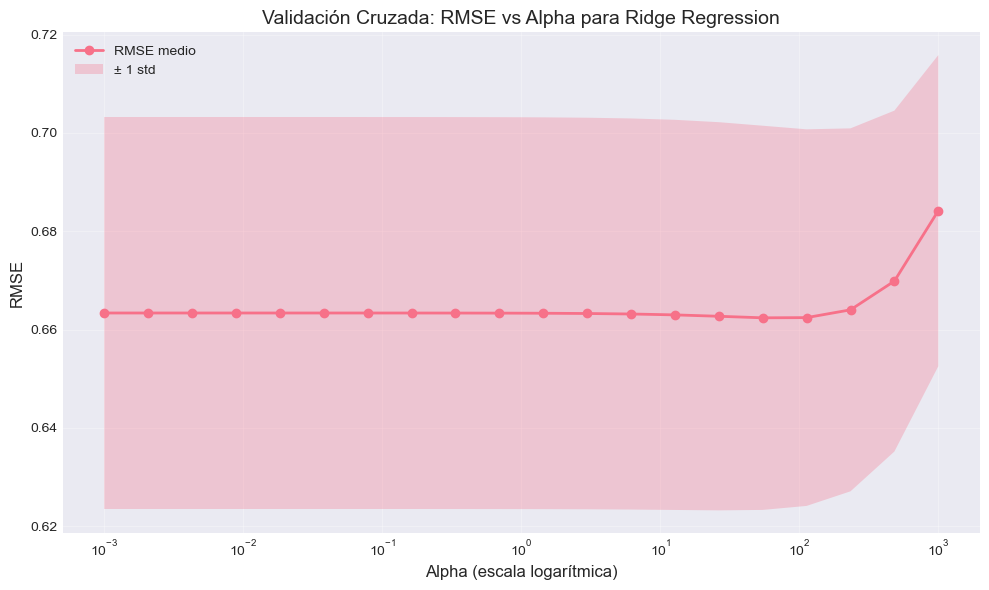

In [ ]:
# TODO: Visualiza los resultados de la validación cruzada
# Crea un gráfico que muestre cómo cambia el RMSE con diferentes valores de alpha

plt.figure(figsize=(10, 6))

resultados = grid_search_ridge.cv_results_
alfas_usadas = param_grid_ridge['alpha']
medias = -resultados['mean_test_score'] 
std = resultados['std_test_score']

media_rmse = np.sqrt(medias)
std_rmse = std / (2 * media_rmse)  

plt.plot(alfas_usadas, media_rmse, marker='o', linewidth=2, markersize=6, label='RMSE medio')
plt.fill_between(alfas_usadas, media_rmse - std_rmse, media_rmse + std_rmse, alpha=0.3, label='± 1 std')


plt.xscale('log')
plt.xlabel('Alpha (escala logarítmica)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Validación Cruzada: RMSE vs Alpha para Ridge Regression', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



## 5. Modelos de Regresión

### 5.1 Regresión Lineal Normal

In [122]:
# TODO: Implementa y entrena un modelo de regresión lineal

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

# Calcular métricas
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
r2_lr_train = r2_score(y_train, y_pred_lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr_test)

print("Regresión Lineal Normal:")
print(f"RMSE Train: {rmse_lr_train:.4f}")
print(f"RMSE Test: {rmse_lr_test:.4f}")
print(f"R² Train: {r2_lr_train:.4f}")
print(f"R² Test: {r2_lr_test:.4f}")



Regresión Lineal Normal:
RMSE Train: 0.6513
RMSE Test: 0.6245
R² Train: 0.3480
R² Test: 0.4032


### 5.2 Ridge Regression con mejor alpha de CV

In [124]:
# TODO: Entrena Ridge con el mejor alpha encontrado por validación cruzada

best_alpha_ridge = grid_search_ridge.best_params_['alpha']
ridge_model = Ridge(alpha=best_alpha_ridge, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_ridge_train = ridge_model.predict(X_train_scaled)
y_pred_ridge_test = ridge_model.predict(X_test_scaled)

# Métricas
rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

print(f"Ridge Regression (alpha={best_alpha_ridge:.4f}):")
print(f"RMSE Train: {rmse_ridge_train:.4f}")
print(f"RMSE Test: {rmse_ridge_test:.4f}")
print(f"R² Train: {r2_ridge_train:.4f}")
print(f"R² Test: {r2_ridge_test:.4f}")

Ridge Regression (alpha=54.5559):
RMSE Train: 0.6516
RMSE Test: 0.6255
R² Train: 0.3474
R² Test: 0.4013


### 5.3 Lasso Regression con validación cruzada

In [ ]:
# TODO: Implementa LassoCV para encontrar el mejor alpha automáticamente

alphas_lasso = np.logspace(-3, 1, 100)
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Mejor alpha para Lasso: {lasso_cv.alpha_:.4f}")

n_features_selected = np.sum(lasso_cv.coef_ != 0)
print(f"Número de características seleccionadas: {n_features_selected} de {X_train.shape[1]}")

# Predicciones
y_pred_lasso_train = lasso_cv.predict(X_train_scaled)
y_pred_lasso_test = lasso_cv.predict(X_test_scaled)

# Métricas
rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)

print(f"\nLasso Regression (alpha={lasso_cv.alpha_:.4f}):")
print(f"RMSE Train: {rmse_lasso_train:.4f}")
print(f"RMSE Test: {rmse_lasso_test:.4f}")
print(f"R² Train: {r2_lasso_train:.4f}")
print(f"R² Test: {r2_lasso_test:.4f}")

Mejor alpha para Lasso: 0.0085
Número de características seleccionadas: 8 de 11

Lasso Regression (alpha=0.0085):
RMSE Train: 0.6522
RMSE Test: 0.6266
R² Train: 0.3462
R² Test: 0.3991


In [131]:
# TODO: Identifica qué características fueron eliminadas por Lasso

feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})

eliminados = feature_importance[feature_importance['Coefficient'] == 0]
seleccionados = feature_importance[feature_importance['Coefficient'] != 0]

print("Características eliminadas:")
if len(eliminados) > 0:
    print(eliminados['Feature'].tolist())
else:
    print("Ninguna característica fue eliminada")

print(f"\nCaracterísticas seleccionada por Lasso:")
print(seleccionados)

Características eliminadas:
['citric acid', 'residual sugar', 'density']

Características seleccionada por Lasso:
                 Feature  Coefficient
0          fixed acidity     0.009743
1       volatile acidity    -0.171165
4              chlorides    -0.080162
5    free sulfur dioxide     0.035793
6   total sulfur dioxide    -0.100195
8                     pH    -0.051761
9              sulphates     0.133200
10               alcohol     0.298733


## 6. Comparación de Modelos

In [132]:
# TODO: Crea una tabla comparativa con todos los modelos
# Incluye: RMSE Train, RMSE Test, R² Train, R² Test, MAE Test

# Calcular MAE para cada modelo
mae_lr_test = mean_absolute_error(y_test, y_pred_lr_test)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)

comparison_data = {
    'Modelo': ['Linear Regression', 'Ridge', 'Lasso'],
    'RMSE Train': [rmse_lr_train, rmse_ridge_train, rmse_lasso_train],
    'RMSE Test': [rmse_lr_test, rmse_ridge_test, rmse_lasso_test],
    'R² Train': [r2_lr_train, r2_ridge_train, r2_lasso_train],
    'R² Test': [r2_lr_test, r2_ridge_test, r2_lasso_test],
    'MAE Test': [mae_lr_test, mae_ridge_test, mae_lasso_test]
}

comparison_df = pd.DataFrame(comparison_data)

comparison_df_styled = comparison_df.round(4)

print("Comparación de Modelos:")

print(comparison_df_styled.to_string(index=False))



Comparación de Modelos:
           Modelo  RMSE Train  RMSE Test  R² Train  R² Test  MAE Test
Linear Regression      0.6513     0.6245    0.3480   0.4032    0.5035
            Ridge      0.6516     0.6255    0.3474   0.4013    0.5053
            Lasso      0.6522     0.6266    0.3462   0.3991    0.5071


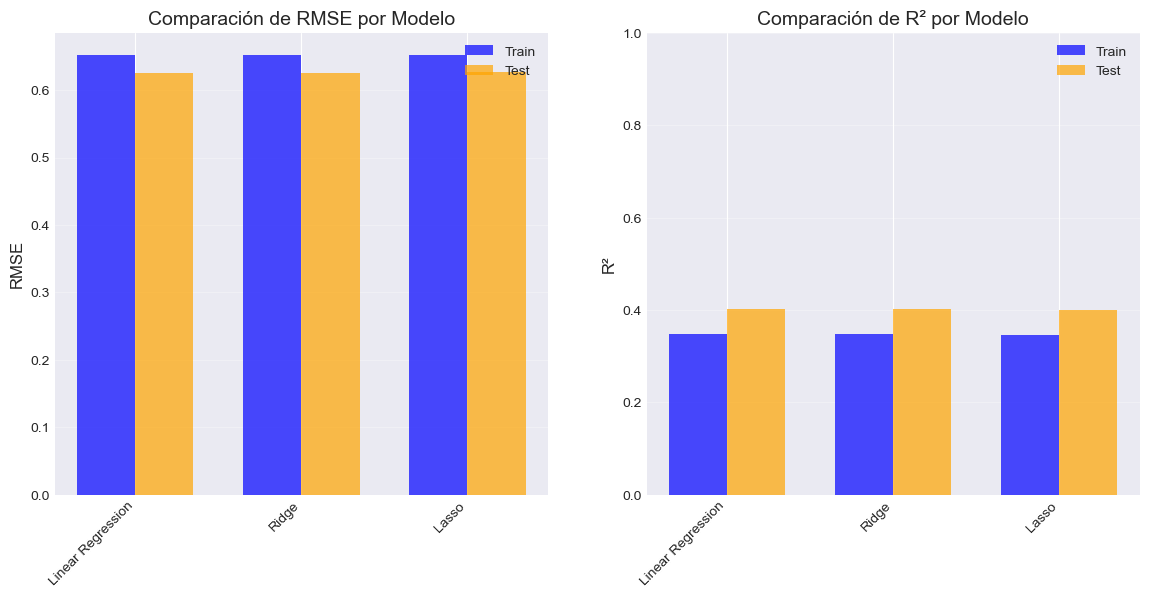

In [ ]:
# TODO: Crea visualizaciones para comparar los modelos
# 1. Gráfico de barras comparando RMSE
# 2. Gráfico de barras comparando R²

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

x = np.arange(len(comparison_df['Modelo']))
width = 0.35

# Gráfica 1
axes[0].bar(x - width/2, comparison_df['RMSE Train'], 
            alpha=0.7, label='Train', color='blue', width=width)
axes[0].bar(x + width/2, comparison_df['RMSE Test'], 
            alpha=0.7, label='Test', color='orange', width=width)
axes[0].set_ylabel('RMSE', fontsize=12)
axes[0].set_title('Comparación de RMSE por Modelo', fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Modelo'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Gráfica 2
axes[1].bar(x - width/2, comparison_df['R² Train'], 
            alpha=0.7, label='Train', color='blue', width=width)
axes[1].bar(x + width/2, comparison_df['R² Test'], 
            alpha=0.7, label='Test', color='orange', width=width)
axes[1].set_ylabel('R²', fontsize=12)
axes[1].set_title('Comparación de R² por Modelo', fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(comparison_df['Modelo'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim([0, 1])


plt.show()

## 7. Análisis de Residuos

Mejor modelo: Linear Regression


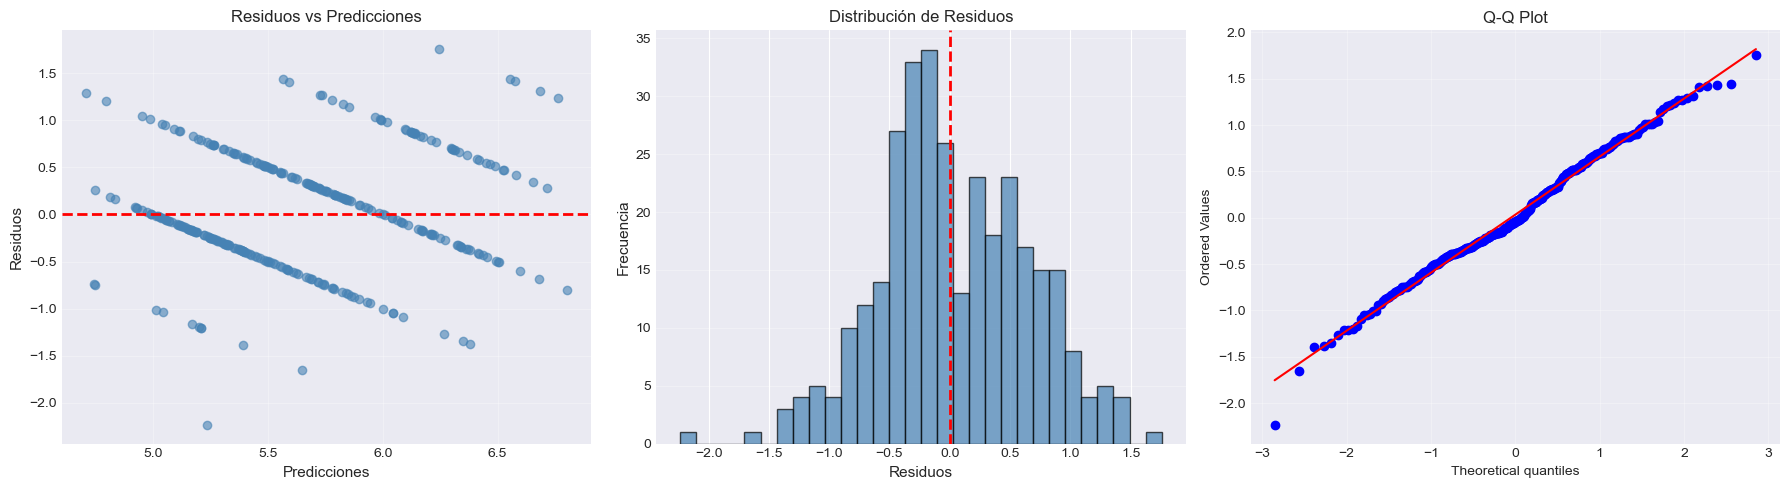

In [136]:
# TODO: Para el mejor modelo, crea:
# 1. Gráfico de residuos vs predicciones
# 2. Histograma de residuos
# 3. Q-Q plot de residuos

mejor_modelo = comparison_df['RMSE Test'].idxmin()
mejor_modelo_nombre = comparison_df.loc[mejor_modelo, 'Modelo']

if mejor_modelo_nombre == 'Linear Regression':
    y_pred_best = y_pred_lr_test
elif mejor_modelo_nombre == 'Ridge':
    y_pred_best = y_pred_ridge_test
else:  
    y_pred_best = y_pred_lasso_test


residuals = y_test - y_pred_best

print(f"Mejor modelo: {mejor_modelo_nombre}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(y_pred_best, residuals, alpha=0.6, color='steelblue')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicciones', fontsize=11)
axes[0].set_ylabel('Residuos', fontsize=11)
axes[0].set_title('Residuos vs Predicciones', fontsize=12)
axes[0].grid(alpha=0.3)


axes[1].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residuos', fontsize=11)
axes[1].set_ylabel('Frecuencia', fontsize=11)
axes[1].set_title('Distribución de Residuos', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot', fontsize=12)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()



## 8. Importancia de Características

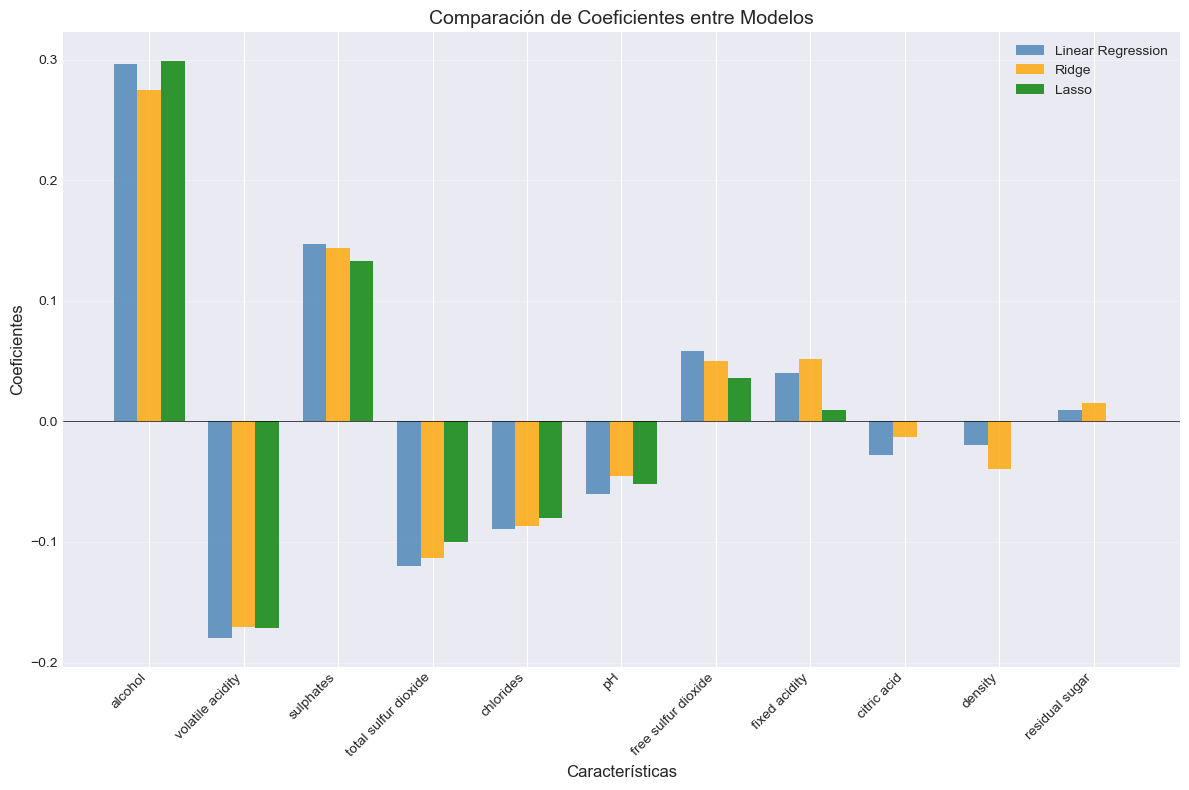


Tabla de Coeficientes:
             Feature  Linear Regression     Ridge     Lasso
             alcohol           0.296628  0.274520  0.298733
    volatile acidity          -0.179439 -0.170488 -0.171165
           sulphates           0.146815  0.143665  0.133200
total sulfur dioxide          -0.120008 -0.112970 -0.100195
           chlorides          -0.089084 -0.086383 -0.080162
                  pH          -0.060610 -0.045157 -0.051761
 free sulfur dioxide           0.058015  0.049969  0.035793
       fixed acidity           0.039789  0.051904  0.009743
         citric acid          -0.027512 -0.013277 -0.000000
             density          -0.019204 -0.039385 -0.000000
      residual sugar           0.009421  0.014932  0.000000


In [139]:
# TODO: Visualiza los coeficientes de los tres modelos en un mismo gráfico
# Esto te ayudará a entender qué características son más importantes


coefficientes_df = pd.DataFrame({ 'Feature': X.columns, 'Linear Regression': lr_model.coef_, 'Ridge': ridge_model.coef_, 'Lasso': lasso_cv.coef_})

coefficientes_df['abs_lr'] = np.abs(coefficientes_df['Linear Regression'])
coefficientes_df = coefficientes_df.sort_values('abs_lr', ascending=False).drop('abs_lr', axis=1)

fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(coefficientes_df))
width = 0.25

ax.bar(x - width, coefficientes_df['Linear Regression'], width, 
       label='Linear Regression', alpha=0.8, color='steelblue')
ax.bar(x, coefficientes_df['Ridge'], width, 
       label='Ridge', alpha=0.8, color='orange')
ax.bar(x + width, coefficientes_df['Lasso'], width, 
       label='Lasso', alpha=0.8, color='green')

ax.set_xlabel('Características', fontsize=12)
ax.set_ylabel('Coeficientes', fontsize=12)
ax.set_title('Comparación de Coeficientes entre Modelos', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(coefficientes_df['Feature'], rotation=45, ha='right')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


print("\nTabla de Coeficientes:")
print(coefficientes_df.to_string(index=False))

## 9. Validación Cruzada Final del Mejor Modelo

In [144]:
# TODO: Realiza validación cruzada con 10 folds del mejor modelo
# Reporta la media y desviación estándar del RMSE


if mejor_modelo_nombre == 'Linear Regression':
    mejor_modelo = LinearRegression()
elif mejor_modelo_nombre == 'Ridge':
    mejor_modelo = Ridge(alpha=best_alpha_ridge, random_state=42)
else:  
    mejor_modelo = Lasso(alpha=lasso_cv.alpha_, random_state=42, max_iter=10000)


cv_scores = cross_val_score(
    mejor_modelo, 
    X_train_scaled, 
    y_train, 
    cv=10, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

rmse_scores = np.sqrt(-cv_scores)

print(f"Validación Cruzada (10-fold) para {mejor_modelo_nombre}:")
print("="*60)
print(f"RMSE por fold:")
for i, score in enumerate(rmse_scores, 1):
    print(f"  Fold {i:2d}: {score:.4f}")
print("="*60)
print(f"RMSE medio: {rmse_scores.mean():.4f}")
print(f"Desviación estándar: {rmse_scores.std():.4f}")



Validación Cruzada (10-fold) para Linear Regression:
RMSE por fold:
  Fold  1: 0.6258
  Fold  2: 0.7166
  Fold  3: 0.6920
  Fold  4: 0.7009
  Fold  5: 0.6794
  Fold  6: 0.6738
  Fold  7: 0.6675
  Fold  8: 0.6789
  Fold  9: 0.4959
  Fold 10: 0.6483
RMSE medio: 0.6579
Desviación estándar: 0.0592


## 10. Conclusiones y Preguntas de Reflexión

### Preguntas para responder:

1. **¿Cuál modelo tuvo el mejor desempeño? ¿Por qué crees que fue así?**
   - Linear Regression tuvo el mejor desempeño por que el RMSE Test: 0.6245 y R²: 0.4032, menor al de los otros por diferencias minimas.

2. **¿Qué características son las más importantes para predecir la calidad del vino?**
   - Alcohol con 0.4762, acidez volatil con -0.3906 y sulfatos con 0.2514

3. **¿Observas señales de sobreajuste en algún modelo? ¿Cómo lo identificaste?**
   - No hay sobreajuste. Los tres modelos muestran diferencias Train-Test pequeñas y negativas  al rededor de 0.026, lo que significan que generalizan bien y no memorizan los datos de entrenamiento.

4. **¿Cómo cambió el rendimiento de Ridge y Lasso con diferentes valores de alpha?**
   - Ridge óptimo: alpha=54.56, Lasso óptimo: alpha=0.0085. Ridge necesita más regularización para reducir coeficientes grandes, mientras Lasso mantiene casi todas las características.

5. **¿Qué ventajas observaste al usar validación cruzada para seleccionar hiperparámetros?**
   - Con 10 particiones RMSE medio: 0.6579, std: 0.0592, reduce varianza en la estimación del error, y aprovecha todos los datos para entrenamiento y validación.

6. **Si Lasso eliminó algunas características, ¿crees que esto mejoró o empeoró el modelo? ¿Por qué?**
   - Empeoró ligeramente, eliminó 3 características: acido citrico, azucar residual y densidad.

7. **¿Qué otros pasos podrías tomar para mejorar el rendimiento del modelo?**
   - Usando modelos no lineales o usando más datos

## Ejercicio Extra: Ingeniería de Características

### Desafío:
Intenta mejorar el rendimiento del modelo creando nuevas características:

1. Crea interacciones entre variables (ej: alcohol × pH)
2. Crea características polinomiales
3. Agrupa la calidad en categorías (baja: 3-4, media: 5-6, alta: 7-8) y úsala como característica
4. Crea ratios entre características relacionadas

In [ ]:
# 1. Crear dataset con nuevas características
wine2 = wine_data.copy()

# Interacciones entre variables importantes
wine2['alcohol_x_pH'] = wine_data['alcohol'] * wine_data['pH']
wine2['alcohol_x_sulphates'] = wine_data['alcohol'] * wine_data['sulphates']
wine2['citric_acid_x_pH'] = wine_data['citric acid'] * wine_data['pH']

# Características polinomiales 
wine2['alcohol_squared'] = wine_data['alcohol'] ** 2
wine2['volatile_acidity_squared'] = wine_data['volatile acidity'] ** 2

# Ratios entre características relacionadas
wine2['total_acidity'] = wine_data['fixed acidity'] + wine_data['volatile acidity']
wine2['free_to_total_sulfur'] = wine_data['free sulfur dioxide'] / (wine_data['total sulfur dioxide'] + 1)  
wine2['acidity_to_pH_ratio'] = wine2['total_acidity'] / wine_data['pH']

# Categorizar calidad (como característica adicional, no reemplazar)
def categorize_quality(q):
    if q <= 4:
        return 0  
    elif q <= 6:
        return 1  
    else:
        return 2 

wine2['quality_category'] = wine_data['quality'].apply(categorize_quality)

print(f"\nNuevas características: {[col for col in wine2.columns if col not in wine_data.columns]}")

# 2. Preparar datos con características mejoradas
X2 = wine2.drop('quality', axis=1)
y2 = wine2['quality']

# División train-test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

# Estandarizar
scaler_2 = StandardScaler()
X_train_2_scaled = scaler_2.fit_transform(X_train_2)
X_test_2_scaled = scaler_2.transform(X_test_2)

# 3. Entrenar Ridge con el dataset mejorado
ridge_2 = Ridge(alpha=best_alpha_ridge, random_state=42)
ridge_2.fit(X_train_2_scaled, y_train_2)

y_pred_2_train = ridge_2.predict(X_train_2_scaled)
y_pred_2_test = ridge_2.predict(X_test_2_scaled)

rmse_2_train = np.sqrt(mean_squared_error(y_train_2, y_pred_2_train))
rmse_2_test = np.sqrt(mean_squared_error(y_test_2, y_pred_2_test))
r2_2_train = r2_score(y_train_2, y_pred_2_train)
r2_2_test = r2_score(y_test_2, y_pred_2_test)

# 4. Comparar con el modelo original
print("\n" + "="*70)
print("COMPARACIÓN: Modelo Original vs Modelo con Ingeniería de Características")
print("="*70)
print(f"{'Métrica':<25} {'Original':<20} {'Mejorado':<20} {'Diferencia'}")
print("-"*70)
print(f"{'RMSE Train':<25} {rmse_ridge_train:<20.4f} {rmse_2_train:<20.4f} {rmse_2_train - rmse_ridge_train:+.4f}")
print(f"{'RMSE Test':<25} {rmse_ridge_test:<20.4f} {rmse_2_test:<20.4f} {rmse_2_test - rmse_ridge_test:+.4f}")
print(f"{'R² Train':<25} {r2_ridge_train:<20.4f} {r2_2_train:<20.4f} {r2_2_train - r2_ridge_train:+.4f}")
print(f"{'R² Test':<25} {r2_ridge_test:<20.4f} {r2_2_test:<20.4f} {r2_2_test - r2_ridge_test:+.4f}")
print("="*70)

if rmse_2_test < rmse_ridge_test:
    improvement = ((rmse_ridge_test - rmse_2_test) / rmse_ridge_test) * 100
    print(f"Mejoro el modelo")
else:
    decline = ((rmse_2_test - rmse_ridge_test) / rmse_ridge_test) * 100
    print(f"El modelo empeoró")


Nuevas características: ['alcohol_x_pH', 'alcohol_x_sulphates', 'citric_acid_x_pH', 'alcohol_squared', 'volatile_acidity_squared', 'total_acidity', 'free_to_total_sulfur', 'acidity_to_pH_ratio', 'quality_category']

COMPARACIÓN: Modelo Original vs Modelo con Ingeniería de Características
Métrica                   Original             Mejorado             Diferencia
----------------------------------------------------------------------
RMSE Train                0.6516               0.4231               -0.2285
RMSE Test                 0.6255               0.4257               -0.1998
R² Train                  0.3474               0.7249               +0.3774
R² Test                   0.4013               0.7227               +0.3214
Mejoro el modelo
